# Image Thresholding
Thresholding in image processing means to update the color value of a pixel to either white or black according to a threshold value. If the pixel value is greater than the threshold value, then set the pixel to WHITE, otherwise set it to BLACK. There are variations to thresholding as well. One of them is inverse thresholding, where we flip greater than to lesser than and everything else remains the same. 

Thresholding is a simple, yet effective method for image partitioning into a foreground and background. The objective of image segmentation is to modify the representation of an image into another representation that is easier to process. For example, image segmentation is commonly used to extract objects from the background based on some properties of the object (for example, color, edges, or histogram). The simplest thresholding methods replace each pixel in the source image with a black pixel if the pixel intensity is less than some predefined constant (the threshold value), or a white pixel, if the pixel intensity is greater than the threshold value.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def displayImage(imageList,cmap=None):
    plt.figure(figsize=(15,10))
    i = 0
    for item in imageList:  
        plt.subplot(2, 4, i+1)
        plt.imshow(item['image'],cmap)
        i += 1
        plt.axis('off')
        plt.title(item['name'],fontsize = 12,color='green')
    plt.tight_layout()
    plt.show()

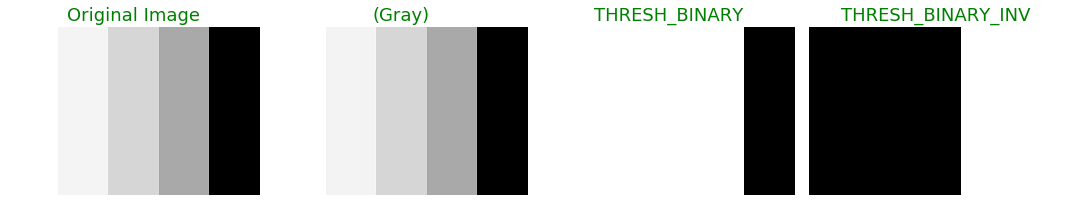

In [69]:
img = cv2.imread('images/black-white-shade.png') 
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(grayImage,50,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(grayImage,200,255,cv2.THRESH_BINARY_INV)
displayImage([
    {'name':'Original Image','image':rgb_img},
    {'name':'(Gray)','image':grayImage},
    {'name':'THRESH_BINARY','image':thresh1},
    {'name':'THRESH_BINARY_INV','image':thresh2},
             ],cmap = 'gray')

Here, thresh1 is the thresholded image, which is a black and white image. Pixels with an intensity of less than 50 will be black, and pixels with an intensity greater than 50 will be white.

Another example can be seen in the following code, where thresh5 corresponds to the thresholded image:
In this case, pixels with an intensity of less than 200 will be black, and pixels with an intensity greater than 200 will be white





## Simple Thresholding:
In order to perform simple thresholding, OpenCV provides the cv2.threshold() function that was briefly introduced in the previous section. The signature for this method is as follows:
cv2.threshold(src, thresh, maxval, type, dst None)  retval, dst

The cv2.threshold() function applies a fixed level thresholding to the src input array (multiple channel, 8 bit or 32 bit floating point). The fixed level is adjusted by the thresh parameter, which sets the threshold value. The type parameter sets the thresholding type,
Additionally, the maxval parameter sets the maximum value to use only with the cv2.THRESH BINARY and cv2.THRESH BINARY INV thresholding types. Finally, the input image should be single channel only in the cv2.THRESH OTSU and cv2.THRESH TRIANGLE thresholding types.


Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different Thresholding types are:
cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV

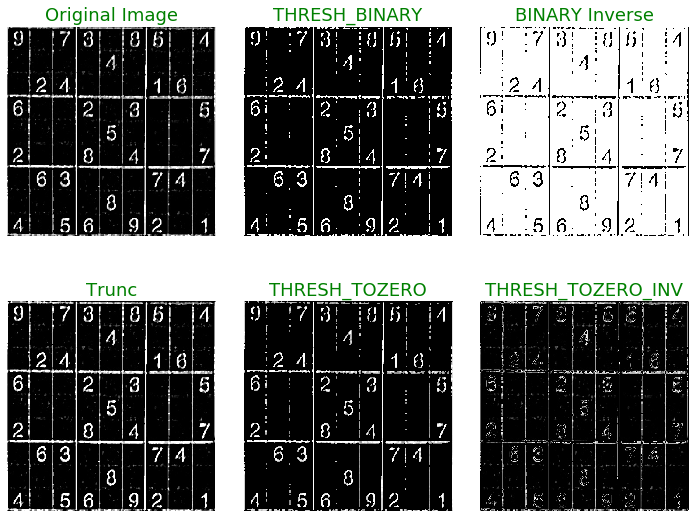

In [74]:
## Simple Thres holding Real Example
def calendarImage():
    img = cv2.imread('images/numbers.jpg') 
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ret,thresh1 = cv2.threshold(grayImage,150,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(grayImage,150,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(grayImage,200,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(grayImage,127,255,cv2.THRESH_TOZERO)
    ret,thresh5 = cv2.threshold(grayImage,200,255,cv2.THRESH_TOZERO_INV)
    displayImage([
        {'name':'Original Image','image':rgb_img},
       {'name':'THRESH_BINARY','image':thresh1},
        {'name':'BINARY Inverse','image':thresh2},
       {'name':'Trunc','image':thresh3},
        {'name':'THRESH_TOZERO','image':thresh4},
       {'name':'THRESH_TOZERO_INV','image':thresh5},
                 ],cmap = 'gray')
calendarImage()

# Adaptive Thresholding
In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image.
So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.
In OpenCV, the adaptive thresholding is performed by the cv2.adapativeThreshold() function. The signature for this method is as follows:

adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C , dst )

This function applies an adaptive threshold to the src array (8 bit single channel image). The maxValue parameter sets the value for the pixels in the dst image for which the condition is satisfied. The adaptiveMethod parameter sets the adaptive thresholding algorithm to use:

    cv2.ADAPTIVE THRESH MEAN C: The T(x, y) threshold value is calculated as the mean of the blockSize x blockSize neighborhood  of (x, y) minus the C parameter .

    cv2.ADAPTIVE THRESH GAUSSIAN C: The T(x, y) threshold value is calculated as the weighted sum of the blockSize x blockSize neighborhood of (x, y) minus the C parameter .

The blockSize parameter sets the size of the neighborhood area used to calculate a threshold value for the pixel, and it can take the values 3, 5, 7,... and so forth.
The C parameter is just a constant subtracted from the means or weighted means (depending on the adaptive method set by the adaptiveMethod parameter). Commonly, this value is positive, but it can be zero or negative. Finally, the thresholdType  parameter sets the cv2.THRESH BINARY or cv2.THRESH BINARY INV thresholding types.


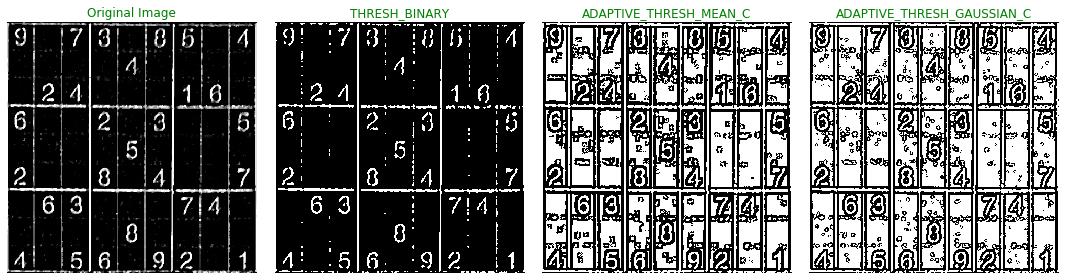

In [79]:
## Adaptive Thres holding Real Example
def adaptiveThresholding():
    img = cv2.imread('images/numbers.jpg') 
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ret,thresh1 = cv2.threshold(grayImage,150,255,cv2.THRESH_BINARY)
    thresh2 = cv2.adaptiveThreshold(grayImage,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    thresh3 = cv2.adaptiveThreshold(grayImage,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    displayImage(
        [
        {'name':'Original Image','image':rgb_img},
       {'name':'THRESH_BINARY','image':thresh1},
        {'name':'ADAPTIVE_THRESH_MEAN_C','image':thresh2},
             {'name':'ADAPTIVE_THRESH_GAUSSIAN_C','image':thresh3},
                 ],
        cmap = 'gray')

adaptiveThresholding()

## Otsu's thresholding algorithm
As we saw in previous sections, the simple thresholding algorithm applies an arbitrary global threshold value. In this case, what we need to do is experiment with different thresholding values and look at the thresholded images in order to see if the result satisfies our necessities. However, this approach can be very tedious.

One solution is to use the adaptive thresholding that OpenCV provides by means of the cv2.adapativeThreshold() function. When applying adaptive thresholding in OpenCV, there is no need to set a thresholding value, which is a good thing.
However, two parameters should be established correctly: the blockSize parameter and the C parameter. Another approach is to use Otsu's binarization algorithm, which is a good approach when dealing with bimodal images. A bimodal image can be characterized by its histogram containing two peaks. Otsu's algorithm automatically calculates the optimal threshold value that separates both peaks by maximizing the variance between two classes of pixels. Equivalently, the optimal threshold value minimizes the intra class variance. Otsu's binarization algorithm is a statistical method, because it relies on statistical information derived from the histogram (for example, mean, variance, or entropy). In order to compute Otsu's binarization in OpenCV, we make use of the cv2.threshold() function as follows:
 ret, th   cv2.threshold(gray image, 0, 255, cv2.THRESH BINARY   cv2.THRESH OTSU)
 
 In this case, there is no need to set a threshold value because Otsu's binarization algorithm calculates the optimal threshold value, that is why thresh   0. The cv2.THRESH OTSU flag indicates that Otsu's algorithm will be applied. Additionally, in this case, this flag is combined with cv2.THRESH BINARY. In fact, it can be combined with cv2.THRESH BINARY, cv2.THRESH BINARY INV, cv2.THRESH TRUNC, cv2.THRESH TOZERO, and cv2.THRESH TOZERO INV. This function returns the thresholded image, th, and the thresholded value, ret.


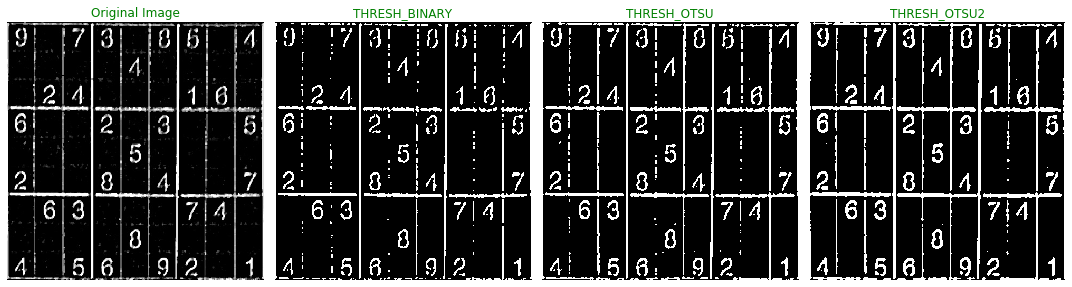

In [80]:
img = cv2.imread('noisy2.png',0)
# global thresholding
# ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# # Otsu's thresholding
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


def otsuThresholding():
    img = cv2.imread('images/numbers.jpg') 
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ret,thresh1 = cv2.threshold(grayImage,127,255,cv2.THRESH_BINARY)
    # Otsu's thresholding
    ret2,thresh2 = cv2.threshold(grayImage,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(grayImage,(5,5),0)
    ret3,thresh3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    displayImage(
        [
        {'name':'Original Image','image':rgb_img},
       {'name':'THRESH_BINARY','image':thresh1},
        {'name':'THRESH_OTSU','image':thresh2},
             {'name':'THRESH_OTSU2','image':thresh3},
                 ],
        cmap = 'gray')

otsuThresholding()